# Predicting Grades for Semester 2 of Second Year

In this project I try to figure out which assignments I am likely to find more difficult based on previous results.
And which ones I am likely to do well in.
I have an intuition that the computer science, stats and pratical assignments are easier than the psychology and written ones. But let's see if this is the case.

The dataset includes the following features:
- 'ModuleCode': the identifier code for the module
- 'ModuleName': the name of the module
- 'ModuleType': the field the assessment belongs to (computer science, psychology etc)
- 'AssessmentName': the name of the assessment
- 'DueDate': the date and time the assessment was due
- 'AssessmentType': whether the assessment was an exam or continuous assessment
- 'SubmissionType': what activity the assessment primarily consisted of (written, programming etc)
- 'Score': The grade achieve for the assessment
- 'CreditsWeight': the weight of the assessment for the modules overall score (100 marks is equal to a 5 credit module)
- 'Submitted': the time the assessment was submitted online

In [1]:
import pandas as pd

In [2]:
grades = pd.read_csv("grades.csv", sep="\t", encoding="unicode-escape")

In [3]:
unique_modules = grades['ModuleName'].unique()
for module in unique_modules:
    print(module)
    
print(len(unique_modules), 'modules') # should be 17

Systems Organisation
Human Centred Computing
Introduction to Programming & Problem-Solving
Relational Databases
User Experience Design
Research Methods in Psychology I
People & Technology
Research Design & Statistical Analysis
Neuroscience, Attention & Perception
Social Psychology
Web Development
Intermediate Programming & Problem-Solving I
Experimental Design and Statistical Applications II
Psychology of Childhood and Adolescence
Applied Cognition
Research Methods in Psychology II
16 modules


I missed a module when I was inputting the data to the excel sheet. Let me just fix that quick

In [4]:
missing_module = pd.DataFrame([
    ["CS2512","Authoring","Computer Science","Assignment 1","13 Nov 2021 23:30","CA","Written",77,30,"13 Nov 2021 19:56"],
["CS2512","Authoring","Computer Science","Assignment 2","27 Nov 2021 23:30","CA","Programming",83,35,"26 Nov 2021 12:02"],
["CS2512","Authoring","Computer Science","Assignment 3","5 Dec 2021 23:30","CA","Programming",71,35,"28 Nov 2021 16:35",]
], columns=["ModuleCode","ModuleName","ModuleType","AssessmentName","DueDate","AssessmentType","SubmissionType","Score","CreditsWeight","Submitted"])

In [5]:
missing_module

,ModuleCode,ModuleName,ModuleType,AssessmentName,DueDate,AssessmentType,SubmissionType,Score,CreditsWeight,Submitted
0,CS2512,Authoring,Computer Science,Assignment 1,13 Nov 2021 23:30,CA,Written,77,30,13 Nov 2021 19:56
1,CS2512,Authoring,Computer Science,Assignment 2,27 Nov 2021 23:30,CA,Programming,83,35,26 Nov 2021 12:02
2,CS2512,Authoring,Computer Science,Assignment 3,5 Dec 2021 23:30,CA,Programming,71,35,28 Nov 2021 16:35


In [6]:
grades = pd.concat([grades, missing_module], ignore_index=True, axis="index")

In [7]:
grades.tail(5)

,ModuleCode,ModuleName,ModuleType,AssessmentName,DueDate,AssessmentType,SubmissionType,Score,CreditsWeight,Submitted,Comments
52,AP2044,Applied Cognition,Psychology,Written Exam,15 Dec 2021 by 18:36,Exam,Written,65,100,15 Dec 2021 at 18:02,NaN
53,AP2114,Research Methods in Psychology II,Psychology,Assignment 1: Thematic Analysis,12/10/2021 11:00,CA,Written,68,50,12/10/2021 07:30,NaN
54,CS2512,Authoring,Computer Science,Assignment 1,13 Nov 2021 23:30,CA,Written,77,30,13 Nov 2021 19:56,NaN
55,CS2512,Authoring,Computer Science,Assignment 2,27 Nov 2021 23:30,CA,Programming,83,35,26 Nov 2021 12:02,NaN
56,CS2512,Authoring,Computer Science,Assignment 3,5 Dec 2021 23:30,CA,Programming,71,35,28 Nov 2021 16:35,NaN


Everything is looking good so far. Notice the different time formats. Let's deal with that!

In [8]:
from datetime import datetime

In [9]:
date_formats = ("%d %b %Y by %H:%S", "%d %b %Y at %H:%S", "%d/%m/%Y %H:%S", "%d %b %Y %H:%S")
issues = []
def parse(date):
    for date_format in date_formats:
        try:
            return datetime.strptime(date, date_format).strftime("%d/%m/%Y %H:%S")
        except ValueError:
            issues.append(date)
    
print(issues)

grades["DueDate"] = grades["DueDate"].apply(lambda date: parse(date))

[]


In [10]:
grades["DueDate"] = pd.to_datetime(grades["DueDate"], dayfirst=True)
grades["Submitted"] = pd.to_datetime(grades["Submitted"], dayfirst=True)

Let's sort the assignments by the time they were submitted

In [11]:
grades = grades.sort_values("Submitted")

In [12]:
grades.head()

,ModuleCode,ModuleName,ModuleType,AssessmentName,DueDate,AssessmentType,SubmissionType,Score,CreditsWeight,Submitted,Comments
14,CS1021,Relational Databases,Computer Science,Lab Assignment 1,2020-10-23 23:59:00,CA,Programming,83,6,2020-10-19 16:20:00,NaN
22,AP1104,Research Methods in Psychology I,Psychology,Prac 1 Research Paper Worksheet,2020-11-09 18:00:00,CA,Written,70,10,2020-10-31 08:41:00,NaN
0,CS1111,Systems Organisation,Computer Science,Assessment 1 - Overview Material Questions,2020-11-08 23:59:00,CA,Written,100,10,2020-11-07 08:50:00,NaN
32,AP1040,Research Design & Statistical Analysis,Statistics,Assignment 1,2020-11-09 11:00:00,CA,Written,87,10,2020-11-08 08:29:00,NaN
15,CS1021,Relational Databases,Computer Science,Lab Assignment 2,2020-11-14 23:59:00,CA,Programming,83,6,2020-11-08 13:24:00,NaN


# Exploratory Analysis

I want to find my average score overall
but getting the mean of the scores doesn't account for the fact that the assignments are worth different amounts of credit

In [13]:
round(grades['Score'].mean(),2) 

82.72

so the 82% is inflated. Fortunately the CreditsWeight column lets us deal with that.

In [14]:
grades["NumberCreditsEarned"] = grades["CreditsWeight"] * (grades["Score"] / 100)
round(grades["NumberCreditsEarned"].sum() / grades["CreditsWeight"].sum(),2) * 100

78.0

78% is not bad at all. 

If we look at the median, we see the distribution is negatively skewed.

In [15]:
grades['Score'].median()

84.0

<AxesSubplot:ylabel='Density'>

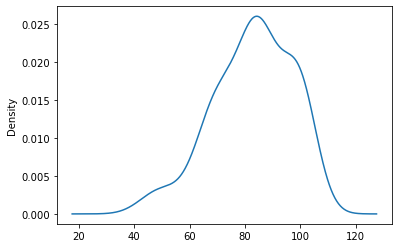

In [16]:
grades["Score"].sort_values().plot(kind="kde") # color by module type, max 100

Okay, I want to see if we can shift that distribution even more to the right by focusing on my weakest points.
Let's see what my 10 worst grades have been so far.

In [17]:
worst_grades = grades["Score"].nsmallest(10).index

In [18]:
grades.loc[worst_grades]

,ModuleCode,ModuleName,ModuleType,AssessmentName,DueDate,AssessmentType,SubmissionType,Score,CreditsWeight,Submitted,Comments,NumberCreditsEarned
44,CS2012,Web Development,Computer Science,Class Test,2021-12-03 11:30:00,Exam,Quiz,45,25,2021-12-03 10:16:00,NaN,11.25
6,CS1111,Systems Organisation,Computer Science,Class Test,2020-12-17 16:00:00,Exam,Written,50,40,2020-12-17 15:44:00,NaN,20.00
38,AP1035,"Neuroscience, Attention & Perception",Psychology,Essay 1,2021-05-04 18:00:00,CA,Written,52,50,2021-05-04 12:21:00,NaN,26.00
40,AP1022,Social Psychology,Psychology,Essay,2021-04-30 15:00:00,CA,Written,62,100,2021-04-30 10:32:00,NaN,62.00
39,AP1035,"Neuroscience, Attention & Perception",Psychology,Essay 2,2021-05-04 18:00:00,CA,Written,62,50,2021-05-04 12:21:00,NaN,31.00
52,AP2044,Applied Cognition,Psychology,Written Exam,2021-12-15 18:36:00,Exam,Written,65,100,2021-12-15 18:02:00,NaN,65.00
31,AP1046,People & Technology,Psychology,Assignment 2,2020-12-14 11:00:00,CA,Written,68,50,2020-12-11 09:58:00,NaN,34.00
53,AP2114,Research Methods in Psychology II,Psychology,Assignment 1: Thematic Analysis,2021-10-12 11:00:00,CA,Written,68,50,2021-10-12 07:30:00,NaN,34.00
49,AP2046,Experimental Design and Statistical Applicatio...,Statistics,Practical Report,2021-12-13 11:00:00,CA,Written,68,50,2021-12-12 11:25:00,NaN,34.00
51,AP2045,Psychology of Childhood and Adolescence,Psychology,Essay,2021-12-21 11:00:00,CA,Written,68,100,2021-12-21 05:21:00,NaN,68.00


With the exception of two very shocking computer science assessments (both of which were exams) it appears overall psychology is my weakest area. But let's confirm this.

In [19]:
grades["ModuleType"] = grades["ModuleType"].astype("category")
grades["AssessmentType"] = grades["AssessmentType"].astype("category")
grades["SubmissionType"] = grades["SubmissionType"].astype("category")

In [20]:
grades.groupby("ModuleType")["Score"].mean().sort_values()

ModuleType
Psychology          72.437500
UX                  75.000000
Statistics          85.000000
Computer Science    88.827586
Name: Score, dtype: float64

In [21]:
grades.groupby("AssessmentType")["Score"].mean().sort_values()

AssessmentType
Exam    71.625000
CA      84.530612
Name: Score, dtype: float64

In [22]:
grades.groupby("SubmissionType")["Score"].mean().sort_values()

SubmissionType
Written         74.240000
Quiz            81.428571
Presentation    84.000000
Programming     91.875000
Name: Score, dtype: float64

Based on this analysis. Written psychology exams are the weak spot. Not surprising really. 
And practical computer science continuous assessments are the strongest. 💪🏻

I just submitted a python assignment. What mark can I hope to get on average based on previous python modules?

In [23]:
python_modules = grades["ModuleName"].isin(["Introduction to Programming & Problem-Solving","Intermediate Programming & Problem-Solving I"])

In [24]:
round(grades[python_modules]["NumberCreditsEarned"].sum() / grades[python_modules]["CreditsWeight"].sum() * 100,2)

87.92

Answer: about 88%

# Building the Logistical Regression Model

Let's see if we can build a model to predict future grades.

First we need to deal with some of the categorical values by turning them into dummy variables making sure to deal with multicollinearity and scale the variables accordingly.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [26]:
cat_features = ["ModuleType","AssessmentType","SubmissionType"]
grades_dummies = pd.get_dummies(grades, columns=cat_features, drop_first=True)

In [27]:
X = grades_dummies[['CreditsWeight','ModuleType_Psychology', 'ModuleType_Statistics', 'ModuleType_UX','AssessmentType_Exam', 'SubmissionType_Programming', 'SubmissionType_Quiz', 'SubmissionType_Written']]
y = grades_dummies['Score']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [29]:
predictions = pipe.predict(X_test)

As we can see below the model did a pretty terrible job of predicting correctly from the data provided. Using categorical values to predict a numerical output means this was likely always going to be the case. For my purposes 100% accuracy is unneccessary. A ball park figure is good enough to take action on. 

In [30]:
print(classification_report(y_test,predictions, zero_division=0))

              precision    recall  f1-score   support

          50       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          68       0.20      1.00      0.33         1
          70       0.00      0.00      0.00         0
          71       1.00      1.00      1.00         1
          73       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         0
          77       0.00      0.00      0.00         1
          80       1.00      1.00      1.00         1
          81       0.00      0.00      0.00         2
          83       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         1
          85       1.00      1.00      1.00         1
          87       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         0
         100       0.50      1.00      0.67         1

    accuracy              

# How Will Semester 2 Go?

In [31]:
semester_2 = pd.read_csv("semester2.csv")

In [32]:
semester_2_dummies = pd.get_dummies(semester_2, columns=cat_features)

In [33]:
predicted_grades = semester_2_dummies[['CreditsWeight','ModuleType_Psychology', 'ModuleType_Statistics', 'ModuleType_UX','AssessmentType_Exam', 'SubmissionType_Programming', 'SubmissionType_Quiz', 'SubmissionType_Written']]
semester_2['Predicted'] = pipe.predict(predicted_grades)

These are the assignments most likely to give me trouble this semester.

In [34]:
semester_2[["ModuleName","AssessmentName", "Predicted"]].sort_values("Predicted").head(7)

,ModuleName,AssessmentName,Predicted
1,Learning & Behaviour,MCQ,45
0,Learning & Behaviour,Essay,68
2,Research Methods in Psychology II,Prac 4 Experiment,68
3,Research Methods in Psychology II,Prac 5 Research Proposal,68
5,Social Computing,Blogs,68
6,Social Computing,Social Analysis Report,68
11,Design for Human Centred Computing,Project Assignment 1,74


In [35]:
semester_2["PredictedCreditsEarned"] = semester_2["CreditsWeight"] * (semester_2["Predicted"] / 100)
round(semester_2["PredictedCreditsEarned"].sum() / semester_2["CreditsWeight"].sum(),2) * 100

73.0

Looks like I'm going to have to work a little harder this semester to keep my grades up. Let's see what modules are likely to cause issues.

In [36]:
semester_2[["ModuleName","Predicted"]].groupby("ModuleName").mean().sort_values("Predicted")

,Predicted
ModuleName,
Learning & Behaviour,56.500000
Social Computing,68.000000
Research Methods in Psychology II,73.666667
Design for Human Centred Computing,74.000000
Intermediate Programming & Problem Solving II,96.250000


## Conclusion
Looks like Learning & Behaviour might prove challenging. I know Dr Linehan can be a tough marker. I'll put a little extra attention there. My intuition about psychology versus computer science seems to be right and this semesters focus on more written psychology will make it just that little bit harder than last semester. But I am ready for it.